## Importamos librerias a usar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import os

## Leemos el archivo obtenido del analisis automático hecho en Fiji

In [63]:
df = pd.read_csv("Alg2n2.csv")
df = df.fillna(value=0) # Rellenamos con ceros los valores NaN del dataframe
df

,Radius_[pixels],Normalized_Integrated_Intensity,slice_2,slice_3,slice_4,slice_5,slice_6,slice_7,slice_8,slice_9,...,slice_469,slice_470,slice_471,slice_472,slice_473,slice_474,slice_475,slice_476,slice_477,slice_478
0,1,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,131,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,132,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,133,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,134,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Control: revisamos como se ve un slice del stack

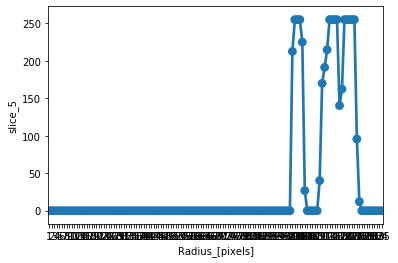

In [3]:
sn.pointplot(x=df["Radius_[pixels]"], y= df["slice_5"])

## Gráfico exploratorio con 4 slices a distintos tiempos: 5, 100, 200, 280 y 340 s

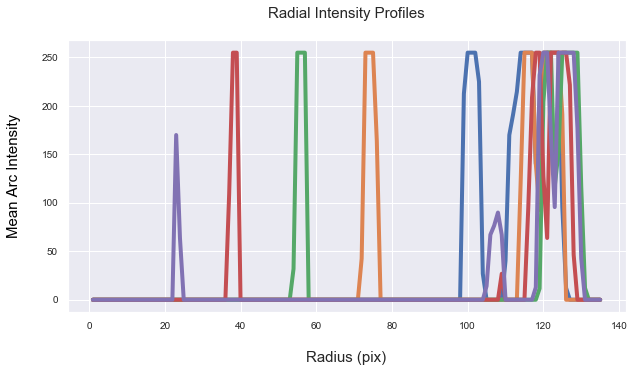

In [44]:
f, ax = plt.subplots(figsize=(10, 5))

sn.set_theme(context='notebook', style='darkgrid', font='arial', font_scale=1, color_codes=True, rc=None)

sn.lineplot(data=df, x="Radius_[pixels]", y="slice_5", linewidth=4) 
sn.lineplot(data=df, x="Radius_[pixels]", y="slice_100", linewidth=4) 
sn.lineplot(data=df, x="Radius_[pixels]", y="slice_200", linewidth=4) 
sn.lineplot(data=df, x="Radius_[pixels]", y="slice_270", linewidth=4)
sn.lineplot(data=df, x="Radius_[pixels]", y="slice_340", linewidth=4)
ax.set_title("Radial Intensity Profiles\n",fontsize = 15 )
ax.set_ylabel("Mean Arc Intensity\n",fontsize = 15 , color = "black")
ax.set_xlabel("\nRadius (pix)",fontsize = 15 )
ax.tick_params(axis = 'both', labelsize = 10)
plt.show()

## Demostracion de como se ven 50 slices

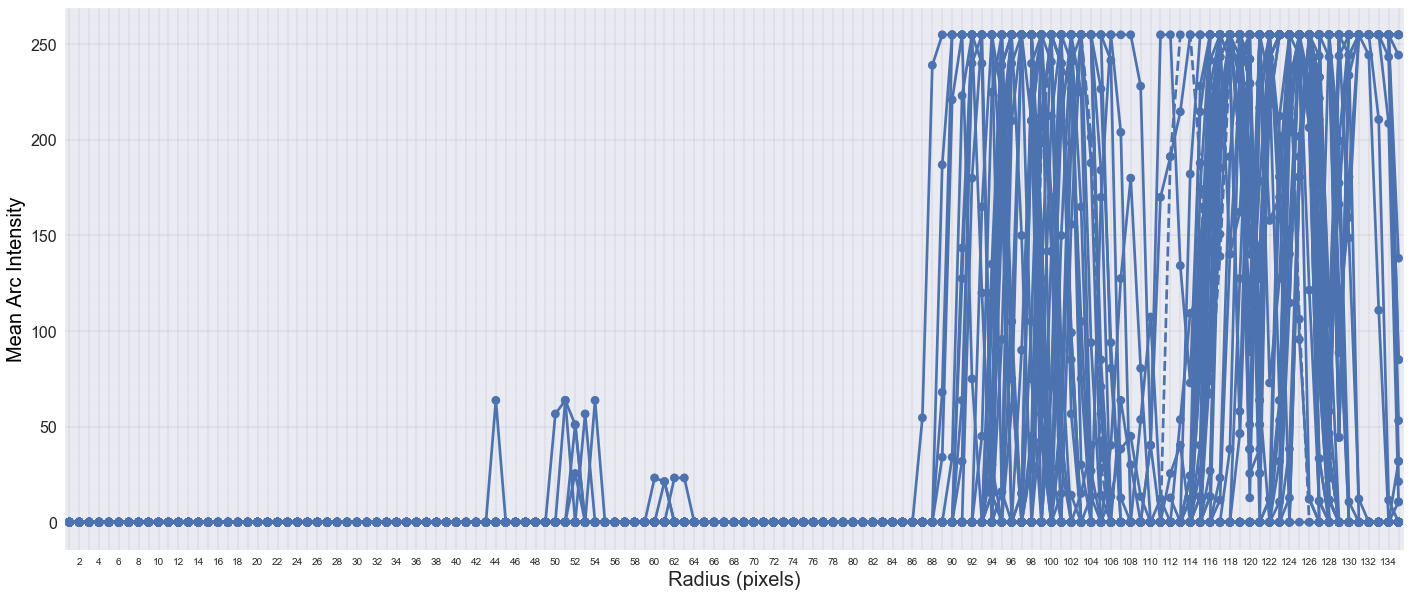

In [61]:
f, ax = plt.subplots(figsize=(24, 10))

for i in range(2,50):
    sn.pointplot(data=df, x="Radius_[pixels]", y="slice_{}".format(str(i)))

ax.set_ylabel("Mean Arc Intensity",fontsize = 20 , color = "black")
ax.set_xlabel("Radius (pixels)",fontsize = 20 )
ax.tick_params(axis = 'y', labelsize = 16)
ax.tick_params(axis = 'x', labelsize = 10)

for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 != 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        ax.tick_params(direction='out', length=4) 

ax.lines[0].set_linestyle("--")
ax.grid(True,color='grey', linestyle='--', linewidth=0.25)

plt.show()

## Usamos scipy.signal para encontrar picos máximos, y con ellos r y r<sub>0</sub>

Hacemos una función que toma el dataframe con las intensidades radiales medias de cada slice, y devuelve otro dataframe con las posiciones de r y r0, y el cociente r/r0
Para ello usamos el signal del modulo scipy

In [50]:
import scipy.signal

def buscalimites(df):

    slices = []
    slice_no = []
    r = []
    r0 = []
    r_r0 = []

    for i in range(1,359):

        maxima = scipy.signal.find_peaks(df[df.columns[i]], height=None, threshold=None, distance=None, prominence=(150,260), width=None, wlen=None, rel_height=None, plateau_size=None)
        if len(maxima[0]) == 0:  
            continue
        else:  
            r_i = maxima[0][0]
            r0_i = maxima[0][-1]
            r_r0_i = r_i/r0_i

            slice_no.append(i)
            slices.append("Slice {}".format(str(i)))
            r.append(r_i )
            r0.append(r0_i)
            r_r0.append(r_r0_i)

    df_gf = pd.DataFrame()

    df_gf["Slice"] = slices
    df_gf["Slice_no"] = slice_no
    df_gf["r0"] = r0
    df_gf["r"] = r
    df_gf["r/r0"] = r_r0
    
    return df_gf

df_gf = buscalimites(df)
df_gf

,Slice,Slice_no,r0,r,r/r0
0,Slice 1,1,116,98,0.844828
1,Slice 2,2,120,100,0.833333
2,Slice 3,3,118,97,0.822034
3,Slice 4,4,124,103,0.830645
4,Slice 5,5,121,100,0.826446
...,...,...,...,...,...
353,Slice 354,354,125,119,0.952000
354,Slice 355,355,124,118,0.951613
355,Slice 356,356,125,119,0.952000
356,Slice 357,357,124,119,0.959677


## Graficamos la evolución temporal de la variable adimensional r/r<sub>0<sub> 

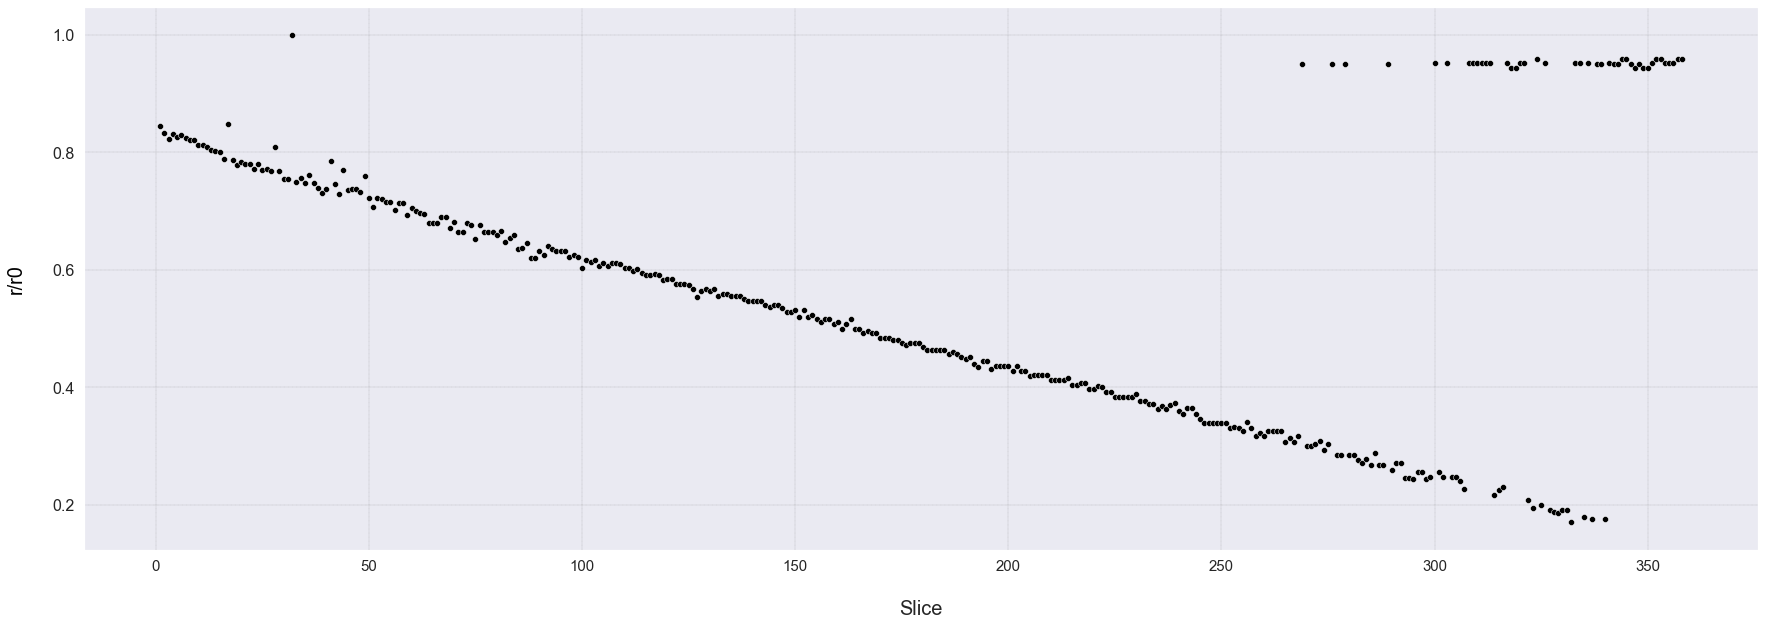

In [65]:
def graficadora(df):
    
    f, ax = plt.subplots(figsize=(30, 10))

    sn.scatterplot(data=df, x="Slice_no", y="r/r0", color= "black")
    ax.set_ylabel("r/r0\n",fontsize = 20 , color = "black")
    ax.set_xlabel("\nSlice",fontsize = 20 )
    ax.tick_params(axis = 'y', labelsize = 16)
    ax.tick_params(axis = 'x', labelsize = 15)
    ax.grid(True,color='grey', linestyle='--', linewidth=0.25)
    plt.show()
    return

graficadora(df_gf)

## A continuación removemos outliers en el rango de slices de [250 - 478]

In [85]:
# Hacemos una pequeña función para remover los outliers OBVIOS.

def outlier_remover(df,slice_interval,quotient_interval):
    
    df["Slice_no"] = pd.to_numeric(df["Slice_no"])
    
    df_outside_bounds = df[(df["Slice_no"] <= slice_interval[0]) | (df["Slice_no"] >= slice_interval[1])]
    
    df_inside_bounds_filtered = df[(df["Slice_no"] > slice_interval[0]) & (df["Slice_no"] < slice_interval[1]) & 
                                   ((df["r/r0"] <= quotient_interval[0]) | (df["r/r0"] >= quotient_interval[1]))]
    
    
    df_purged = pd.concat([df_outside_bounds, df_inside_bounds_filtered], ignore_index=True)
    
    return df_purged

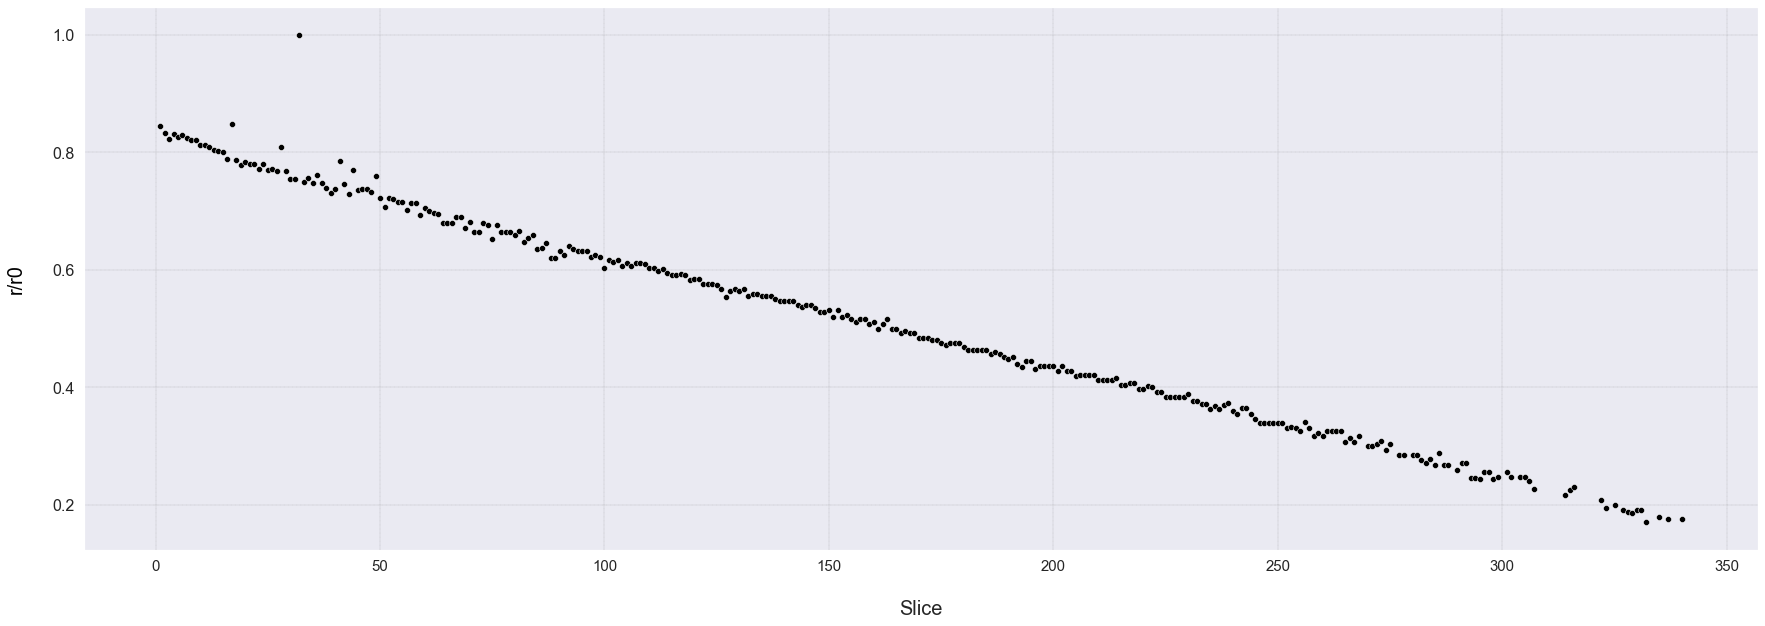

In [88]:
df_purged = outlier_remover(df_gf,(250,478),(0.6,1.0))
graficadora(df_purged)

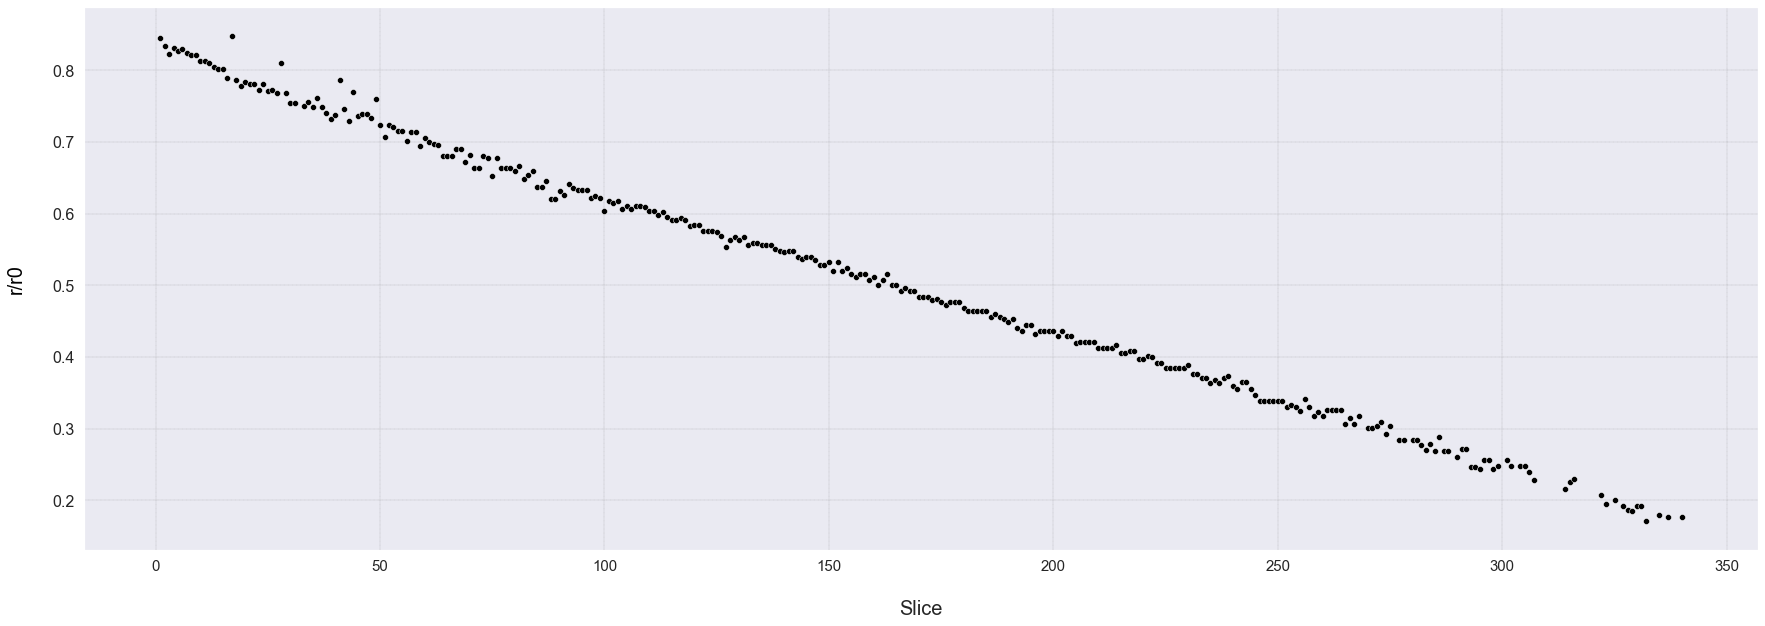

In [92]:
#Removemos el outlier que esta al comienzo de la curva en valor de intensidad 1.0.

df_purged2 = outlier_remover(df_purged,(0,478),(0.9,1.1))
graficadora(df_purged2)

## ¡Listo! ¡Procesamos la señal!